# Lab: Diabetes Prediction Using Machine Learning

## In this lab you will:
 - Perform Exploratory data analysis
 - Build supervised machine learning models
 - Compare model results

## Step 1: Load Packages, Data, and Define Target Variable
In this step, loaded required packages for this notebook and the data to perform the analysis on. and then go on to define the Target variable

In [1]:
# load basic packages and set display options
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [2]:
# load dataset
import pandas as pd
df = pd.read_csv("Diabetes_data.csv")
df.shape

(1000, 11)

In [3]:
# perform data checks
# check for # of columns, rows, column headers, field data tyes
df.shape
print()
df.dtypes

(1000, 11)

ID           object
Gender       object
Age          object
Urea        float64
Cr            int64
Chol        float64
TG          float64
HDL         float64
LDL         float64
VLDL        float64
Diabetes     object
dtype: object

In [ ]:
# create target column and check its distribution
df['target'] = df['Diabetes'].copy()
df = df.drop(columns='Diabetes')
df['target'].value_counts()
print()
df['target'].value_counts(normalize=True)

N    606
Y    394
Name: target, dtype: int64

N    0.606
Y    0.394
Name: target, dtype: float64

## Step 2: Univariate and Bivariate Analysis
In this step, will explore features individually as well as in combination of two. Also try to understand if there is any linear correlation between features and Target variable

In [ ]:
# print dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      1000 non-null   object 
 1   Gender  1000 non-null   object 
 2   Age     1000 non-null   object 
 3   Urea    1000 non-null   float64
 4   Cr      1000 non-null   int64  
 5   Chol    1000 non-null   float64
 6   TG      1000 non-null   float64
 7   HDL     1000 non-null   float64
 8   LDL     1000 non-null   float64
 9   VLDL    1000 non-null   float64
 10  target  1000 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 86.1+ KB


In [ ]:
# generate summary statistics for numerical columns
df.describe()

,Urea,Cr,Chol,TG,HDL,LDL,VLDL
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.842630,66.393000,4.574610,1.969360,1.235500,2.585710,1.300040
std,2.447327,47.116839,1.293485,1.280804,0.588097,0.910924,2.440353
min,0.500000,6.000000,0.000000,0.300000,0.400000,0.300000,0.100000
25%,3.500000,46.000000,3.800000,1.220000,0.917500,2.000000,0.600000
50%,4.425000,59.000000,4.400000,1.600000,1.100000,2.500000,0.810000
75%,5.500000,74.000000,5.002500,2.200000,1.350000,3.110000,1.100000
max,24.000000,800.000000,9.900000,13.800000,9.900000,7.900000,33.600000


In [ ]:
# plot histograms for numerical features to analyze the feature distribution
# use plotly express to plot histogram
import plotly.express as px

# create temp dataset with only numerical fields
df_num = df.select_dtypes(include=['int', 'float'])

# iterate over columns to plot individual histograms
for i in df_num.columns:
    fig = px.histogram(df_num, x=i, height=300, width=700)
    fig.show()

In [ ]:
# observe the skewness in the features

# create temp dataset with only numerical fields
df_num = df.select_dtypes(include=['int', 'float'])

tmp_skew = df_num.skew()
tmp_kurt = df_num.kurtosis()

df_num = pd.merge(tmp_skew.to_frame().rename(columns={0 : 'skew'}),
                  tmp_kurt.to_frame().rename(columns={0 : 'kurtosis'}),
         left_index=True, right_index=True)
df_num

,skew,kurtosis
Urea,3.471705,19.204512
Cr,9.101306,124.649958
Chol,1.146391,3.328788
TG,3.186965,17.695839
HDL,6.909180,83.398326
LDL,0.645410,2.005805
VLDL,7.310496,65.375681


Skewness plays an important role in understanding the linear relationship of features


Definations:
```
Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.
Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.
```


Data is said to be skewed if it is above 1

In [ ]:
# For handling skewness, since the data is right skewed we can opt for log transformation scaling

def logTrans(df, feature):   # function to apply transformer and check the distribution with histogram and kdeplot

    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(df[feature], bins=20, color="red", kde=True , legend=False)

    df[feature + "_log"] = np.log1p(df[feature])

    plt.subplot(1,2,2)
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df[feature + "_log"], bins=20, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()

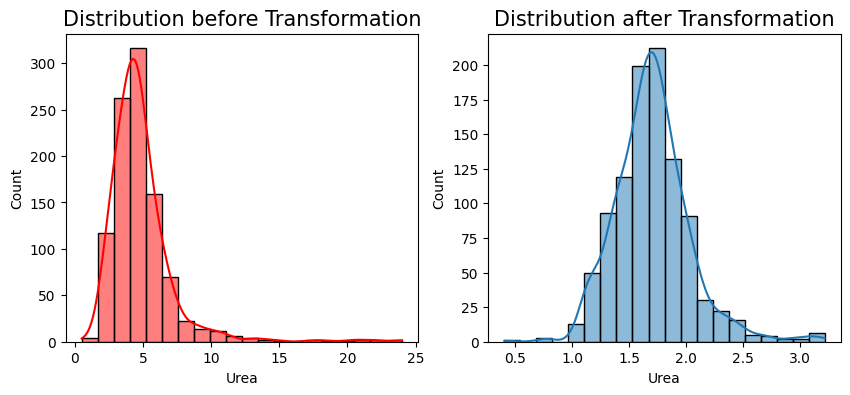

In [ ]:
# Perform scaler transformations of numerical columns
logTrans(df=df, feature="Urea")

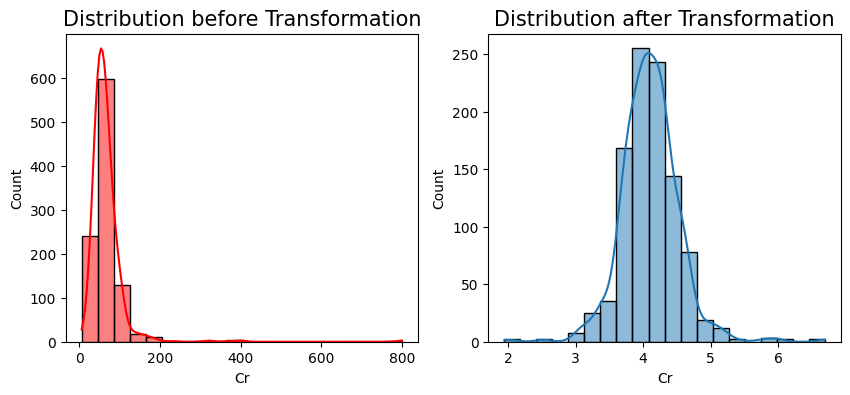

In [ ]:
logTrans(df=df, feature="Cr")

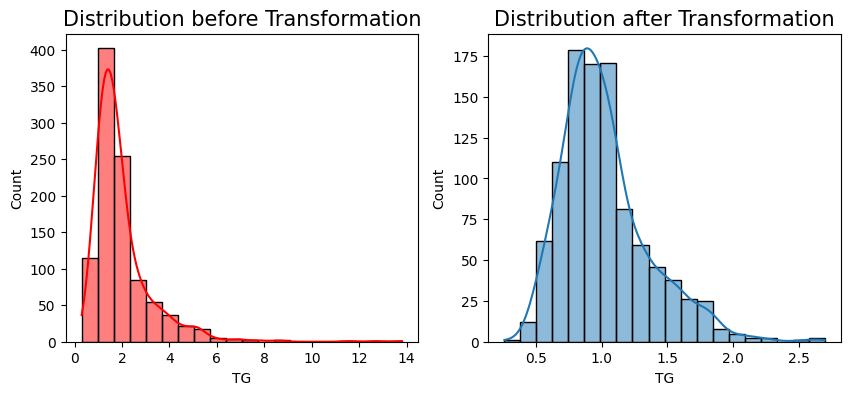

In [ ]:
# Perform scaler transformations of numerical columns
logTrans(df=df, feature="TG")

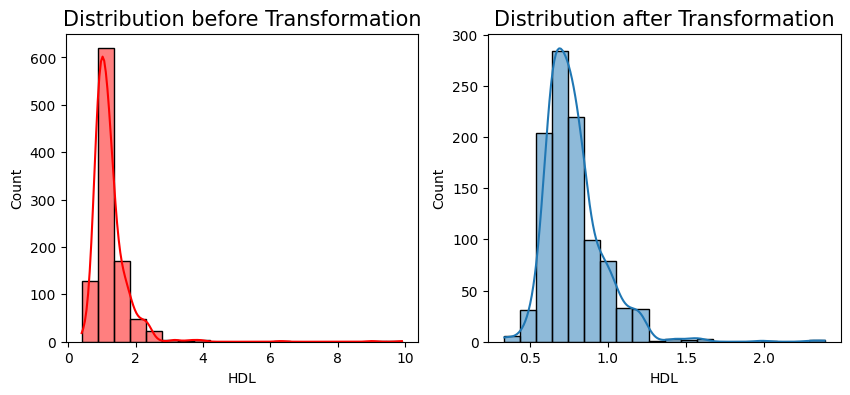

In [ ]:
logTrans(df=df, feature="HDL")

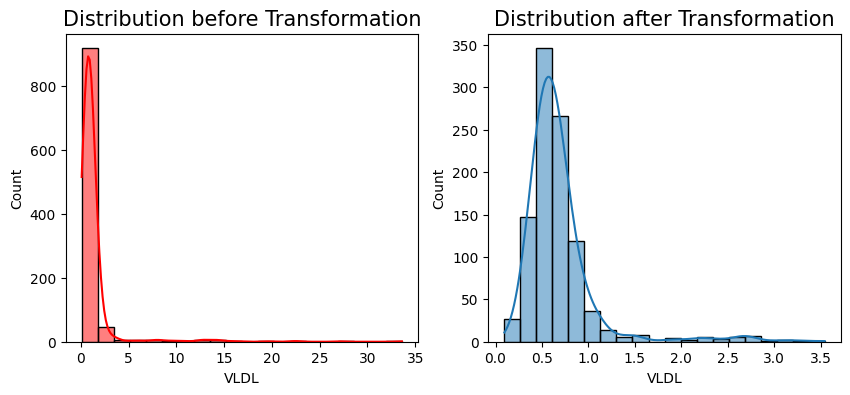

In [ ]:
# Perform scaler transformations of numerical columns
logTrans(df=df, feature="VLDL")

In [ ]:
# apply log transformation
features = ['Urea','Cr','TG', 'HDL', 'VLDL']

for k in features:
    df[k + "_log"] = np.log1p(df[k])

![](https://editor.analyticsvidhya.com/uploads/440971.png)

In [ ]:
# determine outliers (data outside 3 SD) in the numerical fields and find the lower and upper limits
# use pandas describe function with percentiles to get the lower and upper bounds

cols_to_keep = ['Chol','LDL','Urea_log','Cr_log','TG_log','HDL_log','VLDL_log']

df_stats = df[cols_to_keep].describe(percentiles=[.25,.50,.75,.9,.95,.99,.995,]).transpose()
df_stats['lowerl'] = df_stats['mean'] - 3*df_stats['std']
df_stats['upperl'] = df_stats['mean'] + 3*df_stats['std']
df_stats

,count,mean,std,min,25%,50%,75%,90%,95%,99%,99.5%,max,lowerl,upperl
Chol,1000.0,4.574610,1.293485,0.000000,3.800000,4.400000,5.002500,6.100000,7.000000,9.500000,9.500000,9.900000,0.694156,8.455064
LDL,1000.0,2.585710,0.910924,0.300000,2.000000,2.500000,3.110000,3.780000,4.100000,4.901000,5.301000,7.900000,-0.147062,5.318482
Urea_log,1000.0,1.704688,0.329137,0.405465,1.504077,1.691014,1.871802,2.066989,2.262281,2.767632,3.081910,3.218876,0.717276,2.692099
Cr_log,1000.0,4.104407,0.426290,1.945910,3.850148,4.094345,4.317488,4.584967,4.691805,5.226064,5.793630,6.685861,2.825537,5.383278
TG_log,1000.0,1.024303,0.334493,0.262364,0.797507,0.955511,1.163151,1.504077,1.696072,2.041349,2.163763,2.694627,0.020825,2.027781
HDL_log,1000.0,0.783193,0.189716,0.336472,0.651020,0.741937,0.854415,1.029619,1.128333,1.411228,1.568719,2.388763,0.214045,1.352341
VLDL_log,1000.0,0.686058,0.407325,0.095310,0.470004,0.593327,0.741937,0.955511,1.220977,2.708050,2.851555,3.543854,-0.535917,1.908032


In [ ]:
# set the conditional values for the features with outliers
condition = (df['Urea_log'] <= 3.09) & (df['Cr_log'] <= 5.8) & (df['TG_log'] <= 2.17) & (df['HDL_log'] <= 1.6) & (df['VLDL_log'] <= 2.86)

# filter the data based on the condition
df = df[condition].copy()

# remove original features for which we have created log forms
cols_to_remove = ['Urea','Cr','TG','HDL','VLDL']
df = df.drop(columns=cols_to_remove)

In [ ]:
# print the updated number of rows and columns in the data
df.shape

(979, 11)

In [ ]:
# get distribution of categorical features

# create temp dataset with only categorical fields
df_objects = df.select_dtypes(include=['O'])

# drop ID column since it is not a feature
df_objects = df_objects.drop(columns='ID')

for i in df_objects.columns:
  df_objects[i].value_counts().sort_values(ascending=False)
  print()

F    660
M    319
Name: Gender, dtype: int64

46-55    393
36-45    234
56-65    182
20-35    135
66-80     35
Name: Age, dtype: int64

N    604
Y    375
Name: target, dtype: int64

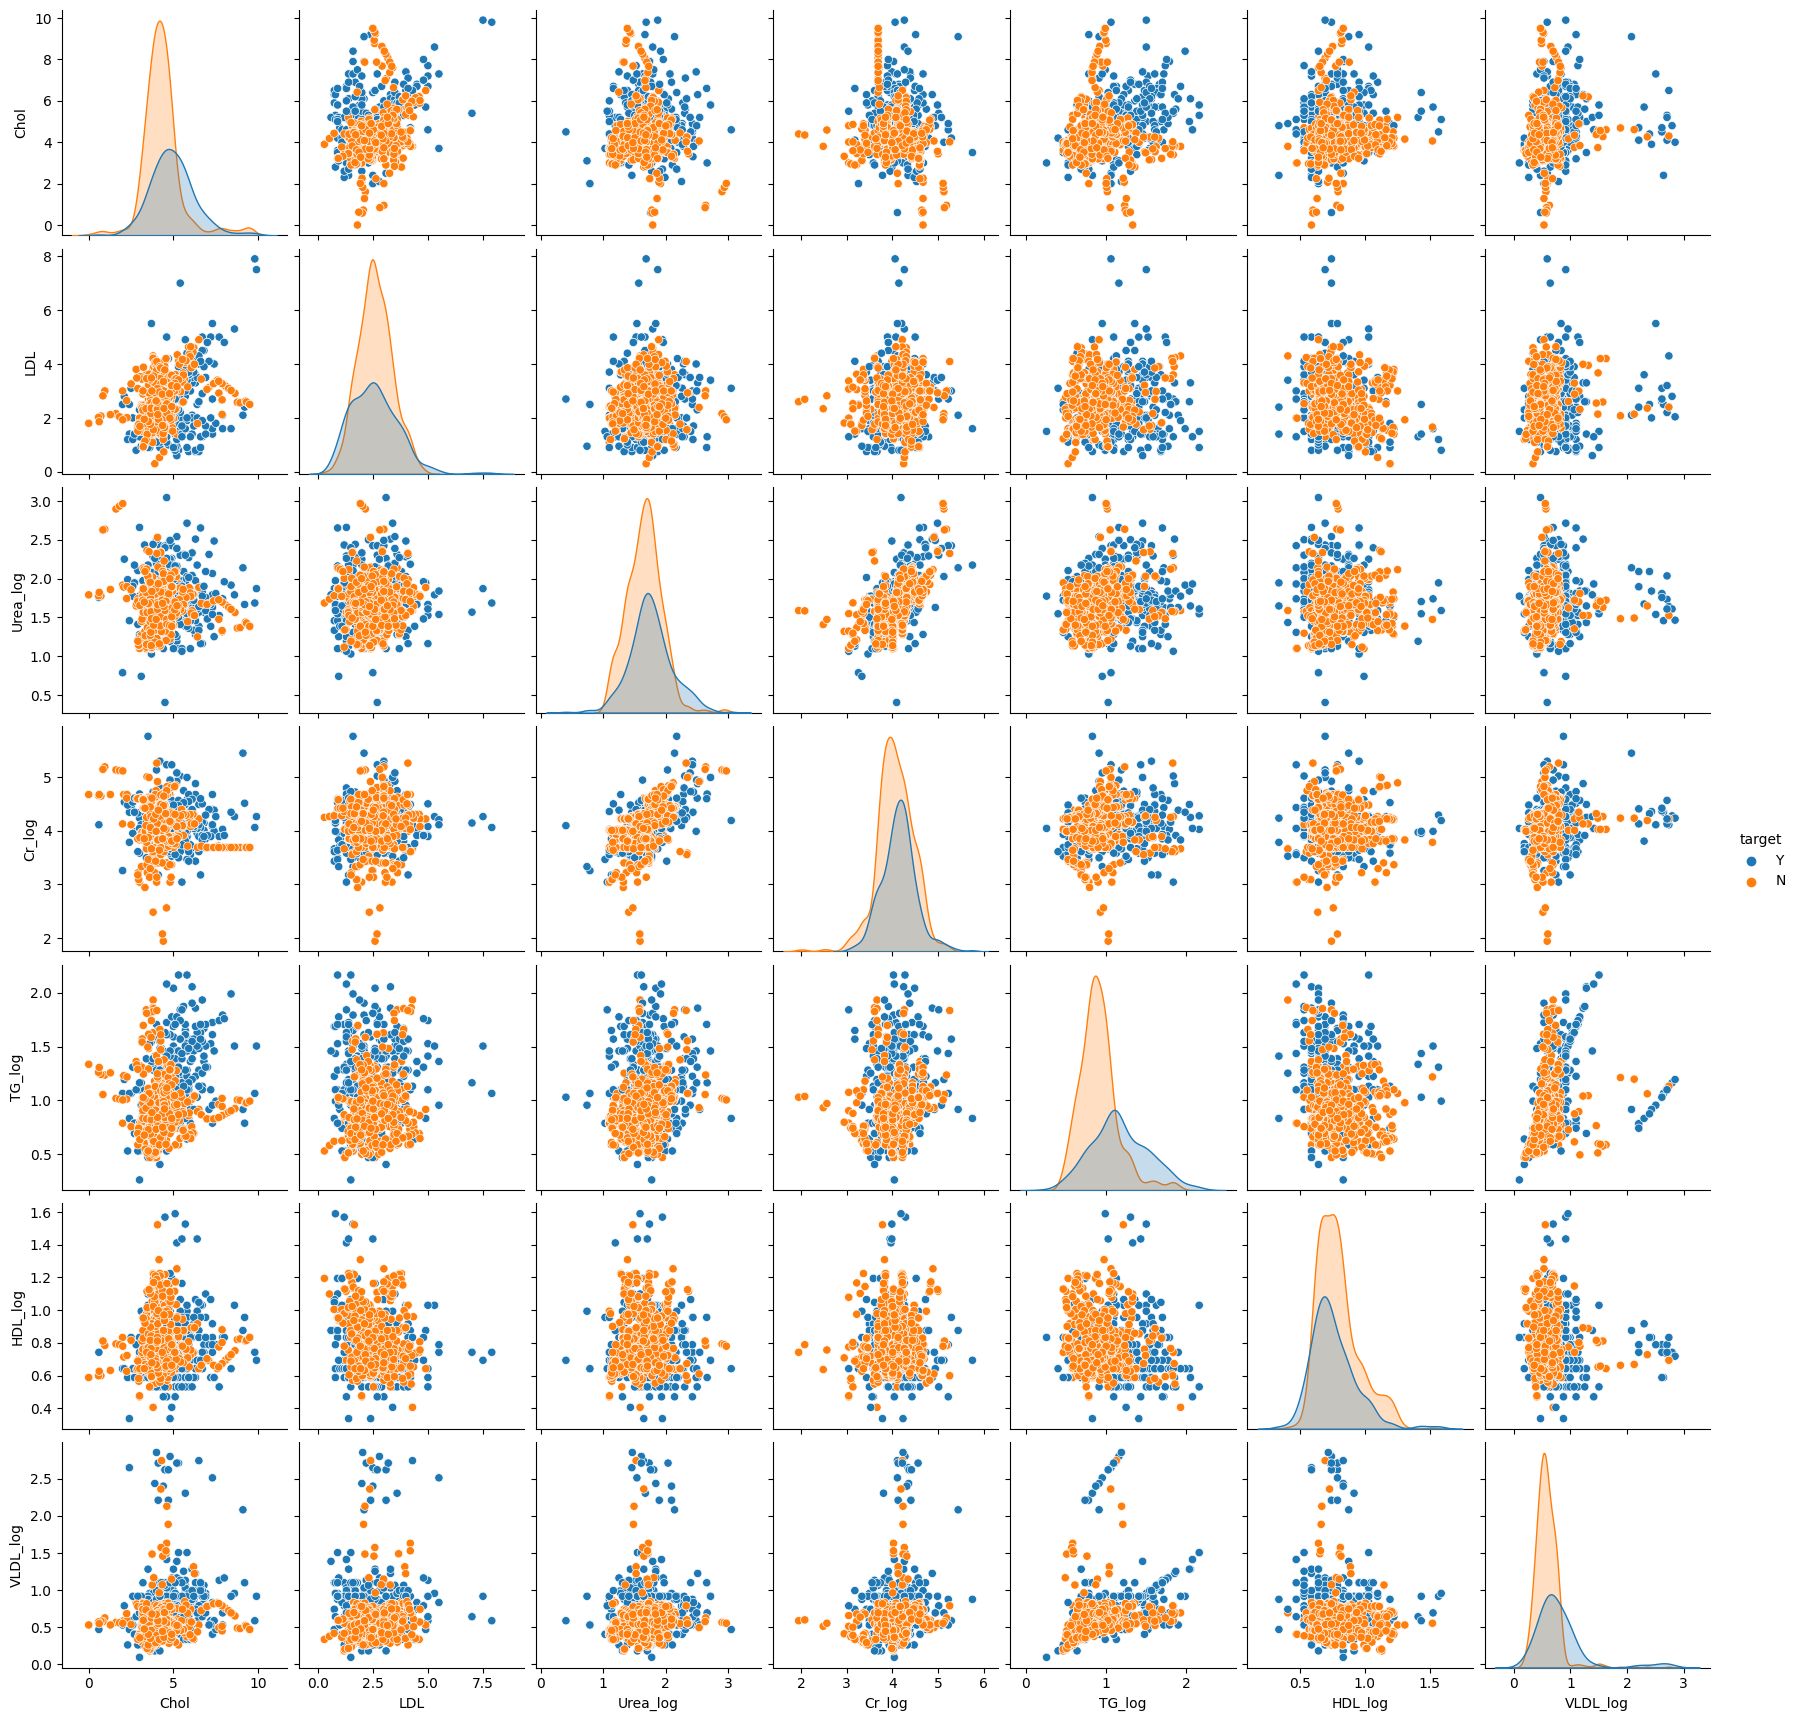

In [ ]:
# plot scatter-plot matrix to compare combination of numerical features
# use sns.pairplot function to plot the matrix

# create temp dataset with only numerical fields
df_num = df.select_dtypes(include=['int', 'float'])

# get list of columns to use for the plots
cols = list(df_num.columns) + ['target']
sns.pairplot(df[cols], hue='target', diag_kind='kde')

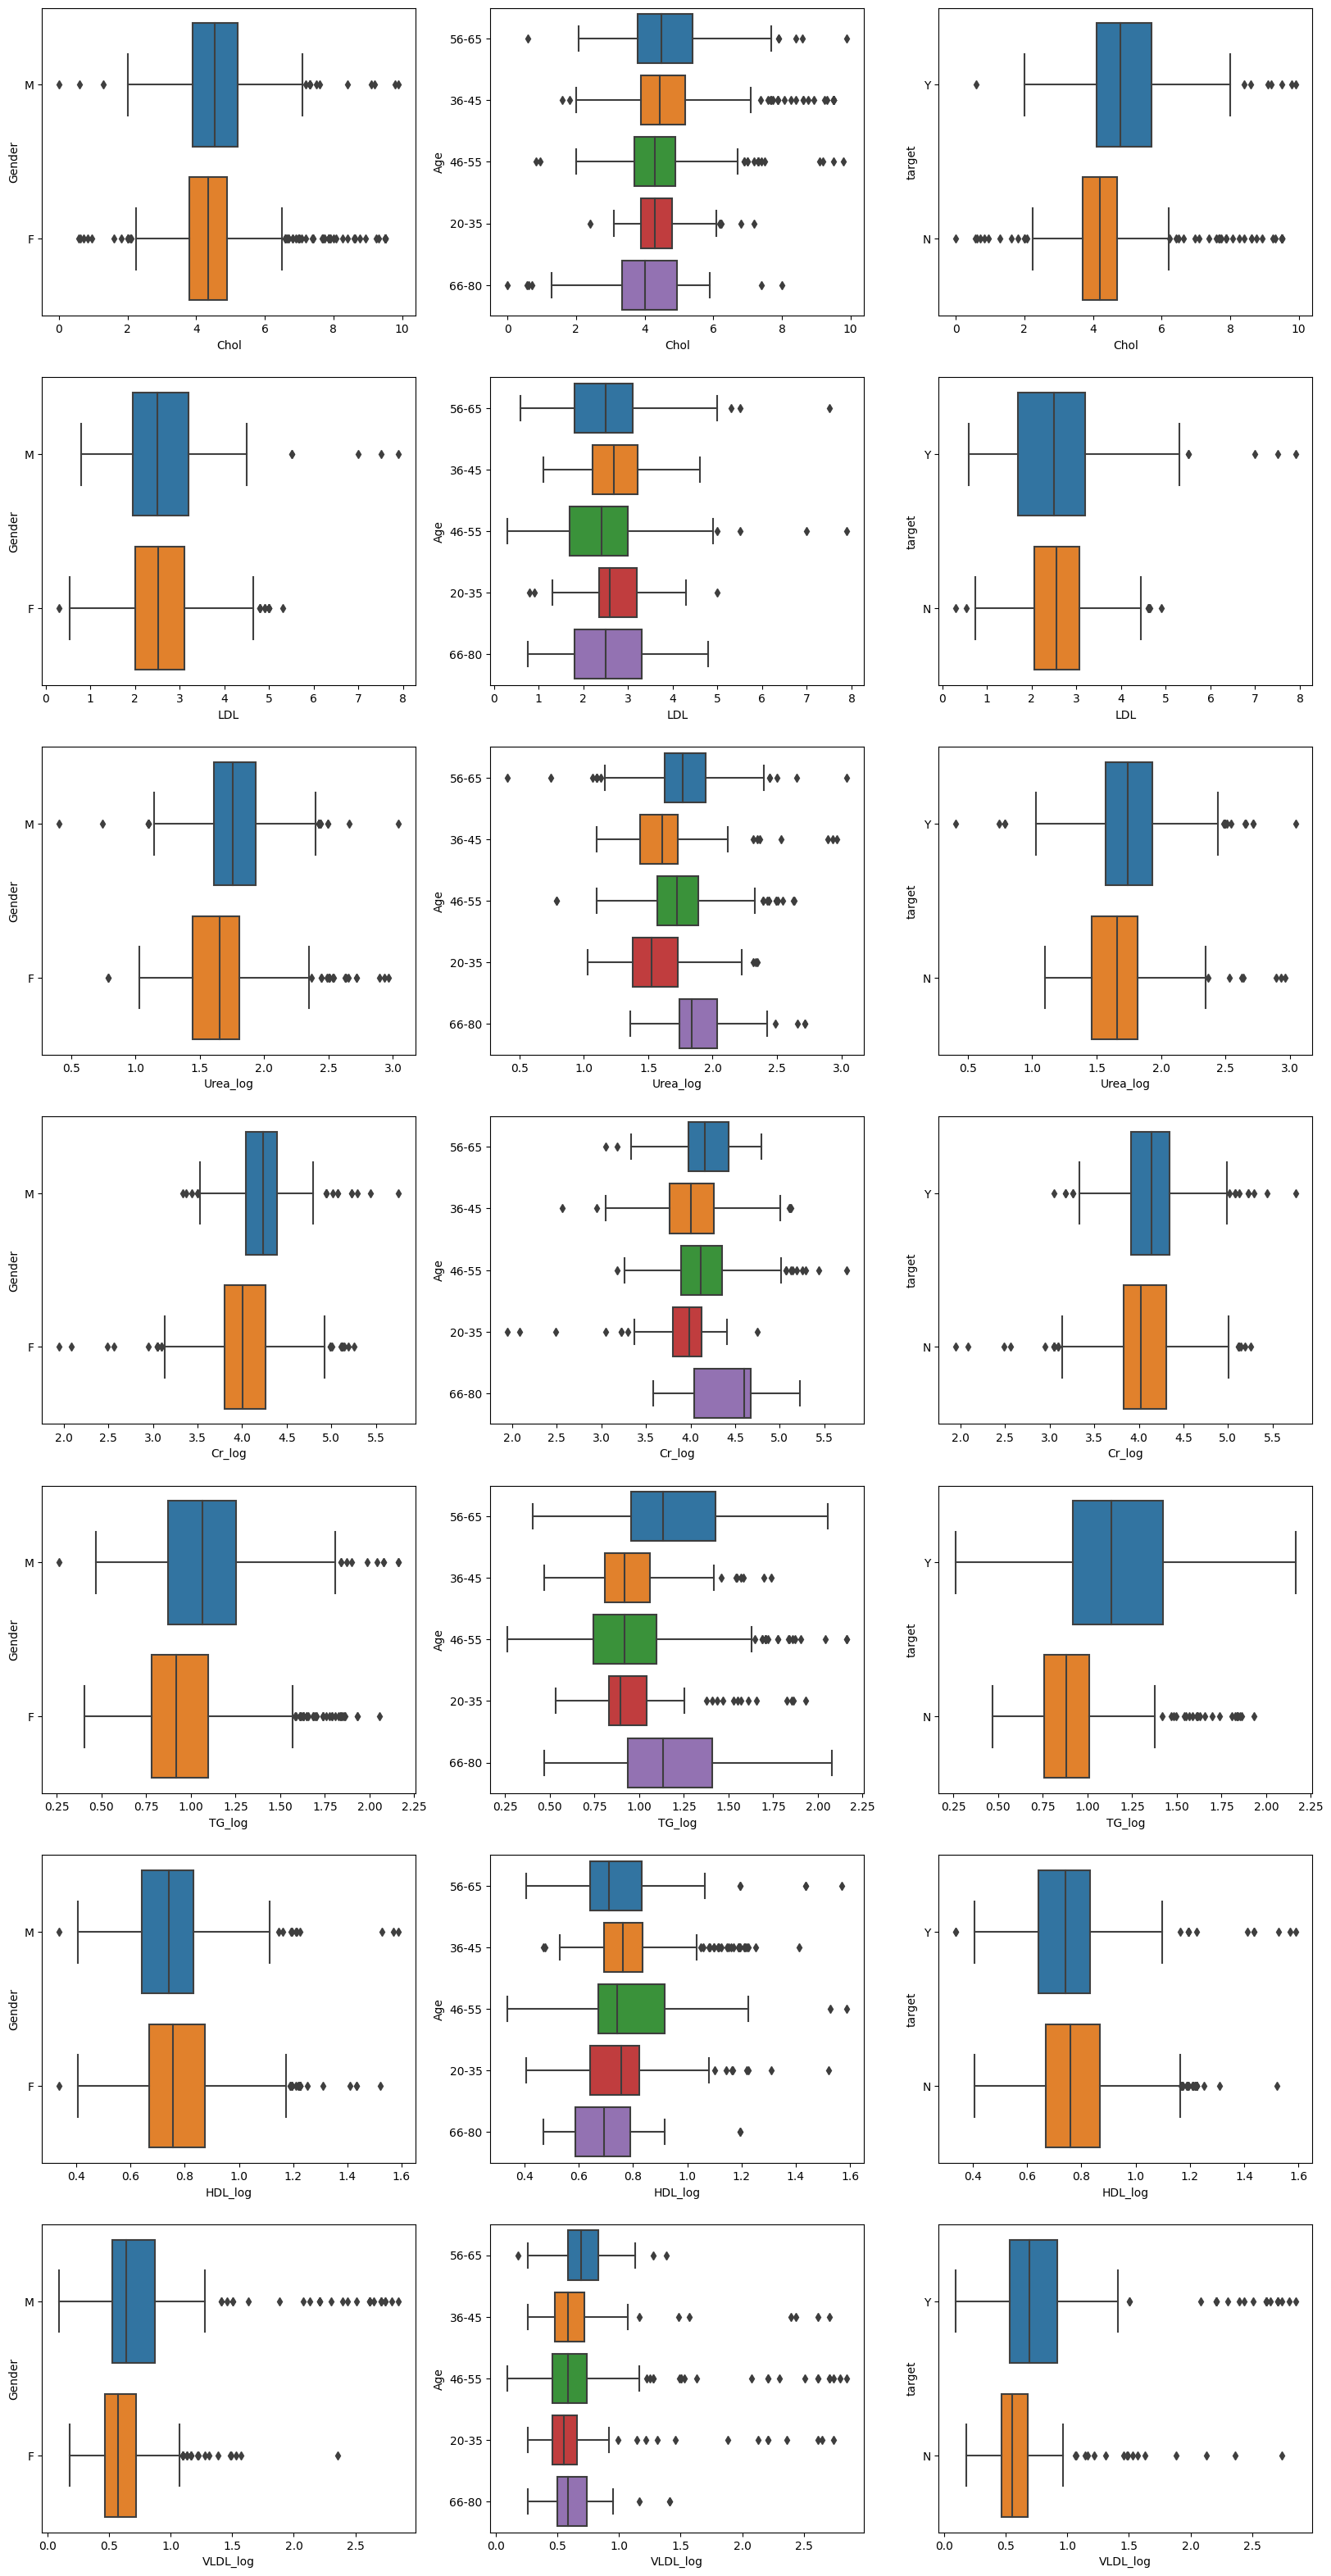

In [ ]:
# Plot box-plot for numerical features split by categorical features

# get # of columns in numerical and categorical dataset
len_ncols=len(df_num.columns)
len_ccols=len(df_objects.columns)

# use sns.boxplot to create box plots for each numerical column split by the categorical column
fig, axs = plt.subplots(nrows=len_ncols, ncols=len_ccols,figsize=(20,40))
i = j = 0
for num_col in df_num.columns:
  for cat_col in df_objects.columns:
    g = sns.boxplot(x=num_col, y=cat_col, data=df, ax=axs[i][j])
    j += 1
    if j==len_ccols:
        i += 1; j = 0

## Step 3: Feature Engineering and Feature Selection
In this step, will convert categorical features to numerical, perform transformation of numerical features if needed, and observe linear/non-linear correlation between features and target variable

In [ ]:
# Encode categorical features - Gender and target to numerical features

# map target N to 0 and Y to 1
df['target'] = df['target'].map({'Y' : 1, 'N' : 0})

# map gender Female to 1 and Male to 0
df['GenF'] = df['Gender'].map({'F' : 1, 'M' : 0})

# get value counts for target and GenF
df['target'].value_counts()
print()
df['GenF'].value_counts()

0    604
1    375
Name: target, dtype: int64

1    660
0    319
Name: GenF, dtype: int64

In [ ]:
# convert Age into ordinal feature

# get list of age values in the order
age_order = ['20-35','36-45', '46-55','56-65','66-80']

# use pandas Categorical function to convert object column to ordinal
df['OrdinalAge'] = pd.Categorical(df['Age'],categories=age_order,ordered=True)

# get codes for the ordinal feature
df['OrdinalAge'] = df['OrdinalAge'].cat.codes + 1

# get value counts for OrginalAge
df['OrdinalAge'].value_counts().sort_index()

1    135
2    234
3    393
4    182
5     35
Name: OrdinalAge, dtype: int64

In [ ]:
# Plot correlation (pearson/spearsman) matrix for all feature variables and the target variable
import plotly.io as pio
features = ['GenF', 'OrdinalAge', 'Chol', 'LDL', 'Urea_log', 'TG_log',
            'Cr_log', 'HDL_log', 'VLDL_log', 'target']

pio.templates.default = "plotly_white"

corr = df[features].corr().round(2)
mask = np.triu(np.ones_like(corr, dtype=bool))

fig = px.imshow(corr.mask(mask),
                color_continuous_scale = 'rdylbu',
                range_color=[-1,1],
                text_auto = True,
                height=600, width=800)

fig = fig.update_xaxes(tickangle=315, showgrid=False, zeroline=False)
fig = fig.update_yaxes(showgrid=False, zeroline=False)

fig.show()

In [ ]:
# removing the feature which high correlation to elimiante multicollinearity
# Urea_log and Cr_log are highly correlated with each other, so eliminating one of them
# since Urea_log has stronger correlation to target, eliminating Cr_log

df = df.drop(columns=['Cr_log'])

## Step 4: Machine Learning Experiments
In this step, will start with creating a baseline model as benchmark and then explore more complex linear & tree-based models to improve the accuracy of our predictions

In [ ]:
# Split the data into Training and Testing samples
from sklearn.model_selection import train_test_split

# create a copy of the main df
df_model = df.copy()

# split the data into 65% training and 35% test dataset
# make sure to perform stratification since the classes are imbalanced
df_train, df_test = train_test_split(df, test_size=0.35, stratify=df['target'], random_state=42)

In [ ]:
# print target distribution in train and test dataset
# use value_counts pandas function
df_train['target'].value_counts(normalize=True)
print ()
df_test['target'].value_counts(normalize=True)

0    0.616352
1    0.383648
Name: target, dtype: float64

0    0.618076
1    0.381924
Name: target, dtype: float64

In [ ]:
df_test.head(2)

,ID,Gender,Age,Chol,LDL,target,Urea_log,TG_log,HDL_log,VLDL_log,GenF,OrdinalAge
263,P000509,M,46-55,5.1,1.4,1,2.054124,1.098612,0.832909,0.916291,0,3
384,P000777,M,46-55,4.8,2.8,1,1.609438,1.163151,0.741937,2.797281,0,3


In [ ]:
features = ['GenF', 'OrdinalAge', 'Chol', 'LDL', 'Urea_log', 'TG_log',  'HDL_log', 'VLDL_log']

target = ['target']

In [ ]:
df_train[features].head()

,GenF,OrdinalAge,Chol,LDL,Urea_log,TG_log,HDL_log,VLDL_log
466,0,4,5.50,4.10,1.902108,0.916291,0.530628,0.530628
157,0,4,9.90,7.50,1.871802,1.504077,0.693147,0.916291
940,1,1,6.24,3.99,1.526056,1.040277,0.891998,1.220830
592,1,2,9.50,2.50,1.386294,0.993252,0.832909,0.470004
152,0,3,6.70,1.30,1.824549,1.131402,1.029619,0.693147


In [ ]:
# create a confusion matrix function to calcuate the matrix and model accuracy metrics and print them
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

def make_confusion_matrix(y, y_pred, title=None):
    cm = confusion_matrix(y, y_pred)

    fig, ax = plt.subplots(figsize=(5, 5))

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues", colorbar=False, ax=ax)

    if title:
        plt.title(f"Confusion Matrix for {title}", fontdict={'fontsize' : 10})

    plt.show()

DummyClassifier(constant=1, strategy='constant')

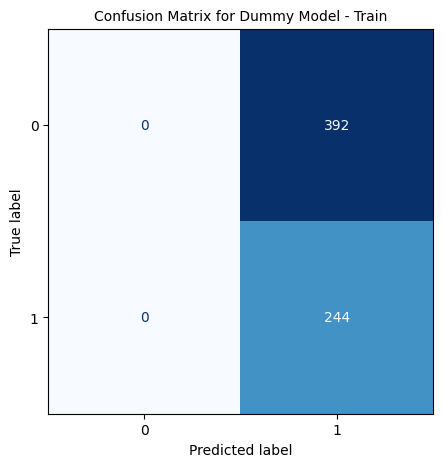

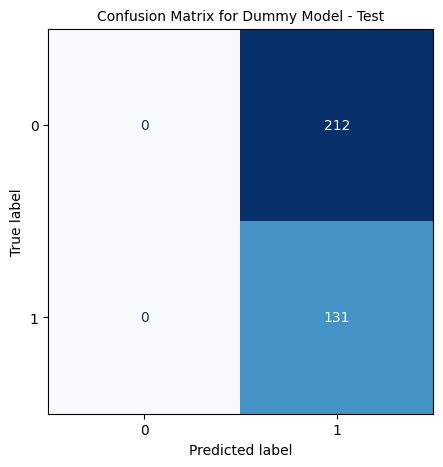

In [ ]:
# Build baseline model by simply predicting all records as target=1
from sklearn.dummy import DummyClassifier

train, test = df_train.copy(), df_test.copy()

dummy_model = DummyClassifier(strategy="constant", constant=1)
dummy_model.fit(train[features], y=train['target'])

# predict
train['pred'] = dummy_model.predict(train[features])
test['pred'] = dummy_model.predict(test[features])

make_confusion_matrix(y=train['target'], y_pred=train['pred'], title="Dummy Model - Train")
make_confusion_matrix(y=test['target'], y_pred=test['pred'], title="Dummy Model - Test")

MinMaxScaler()

LogisticRegression(C=0.001, class_weight='balanced', random_state=42)

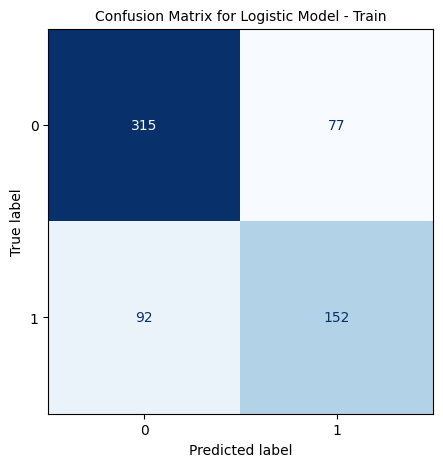

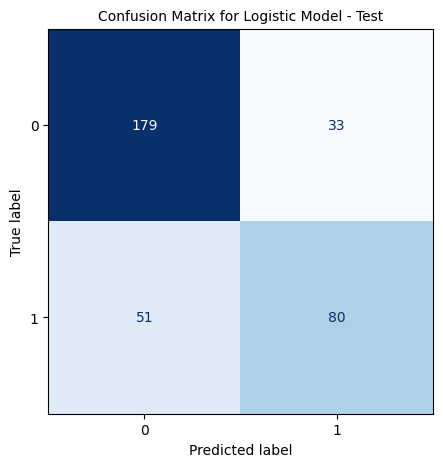

In [ ]:
# Build Logistic Model
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

train, test = df_train.copy(), df_test.copy()

# Perform scaling to standardalize the numerical columns
mmTr = MinMaxScaler()
mmTr.fit(train[features])

train[features] = mmTr.transform(train[features])
test[features] = mmTr.transform(test[features])

clf = LogisticRegression(C=0.001, random_state=42, class_weight="balanced")

log_model = clf.fit(train[features], train['target'])
log_model

# predict
train['pred'] = log_model.predict(train[features])
test['pred'] = log_model.predict(test[features])

make_confusion_matrix(y=train['target'], y_pred=train['pred'], title="Logistic Model - Train")
make_confusion_matrix(y=test['target'], y_pred=test['pred'], title="Logistic Model - Test")

DecisionTreeClassifier(class_weight='balanced', max_depth=3, min_samples_leaf=8,
                       min_samples_split=8, random_state=42)

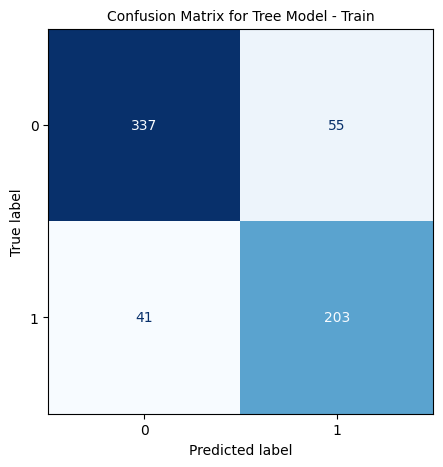

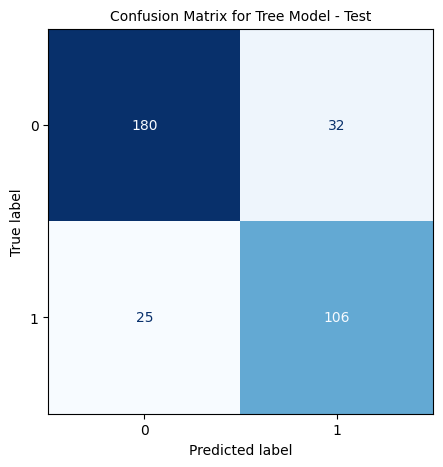

In [ ]:
# Build Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

train, test = df_train.copy(), df_test.copy()

clf = DecisionTreeClassifier(class_weight='balanced',
                             max_depth=3,
                             min_samples_leaf=8,
                             min_samples_split=8,
                            random_state=42)

tree_model = clf.fit(train[features], train['target'])
tree_model

# predict
train['pred'] = tree_model.predict(train[features])
test['pred'] = tree_model.predict(test[features])

make_confusion_matrix(y=train['target'], y_pred=train['pred'], title="Tree Model - Train")
make_confusion_matrix(y=test['target'], y_pred=test['pred'], title="Tree Model - Test")

RandomForestClassifier(class_weight='balanced_subsample', max_depth=3,
                       min_samples_leaf=6, min_samples_split=6,
                       n_estimators=200, random_state=42)

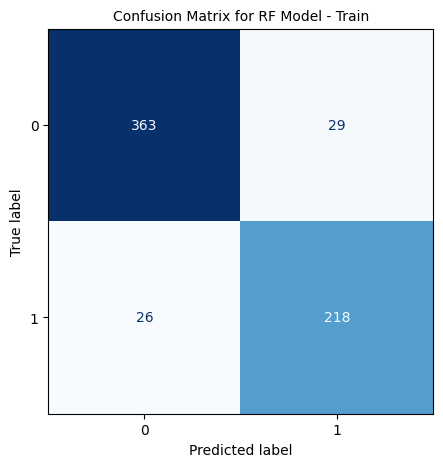

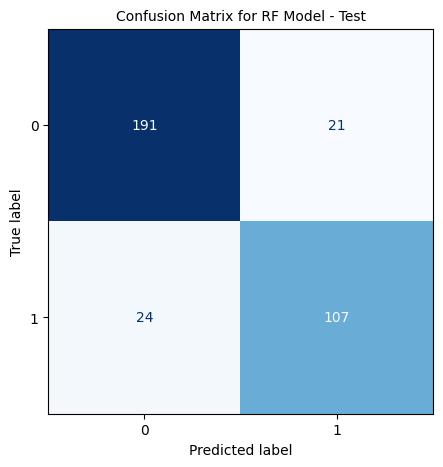

In [ ]:
# Build Random Forest Model
from sklearn.ensemble import RandomForestClassifier

train, test = df_train.copy(), df_test.copy()

clf = RandomForestClassifier(max_features="sqrt",
                             max_depth=3,
                             min_samples_leaf=6,
                             min_samples_split=6,
                             n_estimators=200,
                             class_weight="balanced_subsample",
                             random_state=42)

rf_model = clf.fit(train[features], train['target'])
rf_model

# predict
train['pred'] = rf_model.predict(train[features])
test['pred'] = rf_model.predict(test[features])

make_confusion_matrix(y=train['target'], y_pred=train['pred'], title="RF Model - Train")
make_confusion_matrix(y=test['target'], y_pred=test['pred'], title="RF Model - Test")

## Step 5: Model Comparison and Best Model Selection
In this step, will compare the accuracy of models built in the previous step across multiple metrics and select the best performing model

In [ ]:
from sklearn.metrics import fbeta_score, make_scorer, roc_auc_score, precision_score, f1_score, recall_score

def get_metrics(y, y_pred, title):
    result = pd.DataFrame.from_dict({
        'title' : title,
        'auc' : [roc_auc_score(y, y_pred)],
        'precision' : [precision_score(y, y_pred)],
        'recall' : [recall_score(y, y_pred)],
        'f1_score' :[f1_score(y, y_pred)],
        'f05_score' : [fbeta_score(y, y_pred, beta=0.5)]
    })
    return result

In [ ]:
# Generate accuracy metrics for all the models
# Compile the various accuracy metrics into one dataframe

df_res = pd.DataFrame()

models = [dummy_model, log_model, tree_model, rf_model]

for model in models:
    train, test = df_train.copy(), df_test.copy()
    # Perform scaling to standardalize the numerical columns

    name = model.__class__.__name__

    if name == 'LogisticRegression':
      train[features] = mmTr.transform(train[features])
      test[features] = mmTr.transform(test[features])

    # predict
    train['pred'] = model.predict(train[features])
    test['pred'] = model.predict(test[features])

    train = get_metrics(train['target'], train['pred'], title=f"train_{name}")
    test = get_metrics(test['target'], test['pred'], title=f"test_{name}")
    df_res = pd.concat([df_res, train, test], ignore_index=True)

In [ ]:
# Print the model comparison dataframe
df_res[df_res['title'].str.contains('train')].set_index('title')

,auc,precision,recall,f1_score,f05_score
title,,,,,
train_DummyClassifier,0.500000,0.383648,1.000000,0.554545,0.437590
train_LogisticRegression,0.713261,0.663755,0.622951,0.642706,0.655172
train_DecisionTreeClassifier,0.845831,0.786822,0.831967,0.808765,0.795455
train_RandomForestClassifier,0.909732,0.882591,0.893443,0.887984,0.884740


In [ ]:
# Select the best model based on accuracy of Test data
df_res[df_res['title'].str.contains('test')].set_index('title')

,auc,precision,recall,f1_score,f05_score
title,,,,,
test_DummyClassifier,0.500000,0.381924,1.000000,0.552743,0.435795
test_LogisticRegression,0.727513,0.707965,0.610687,0.655738,0.686106
test_DecisionTreeClassifier,0.829108,0.768116,0.809160,0.788104,0.775988
test_RandomForestClassifier,0.858869,0.835938,0.816794,0.826255,0.832037


## Step 6: Model Deep-Dive
In this step, will deep-dive into selected models and explore them further through ROC Curve and feature importance

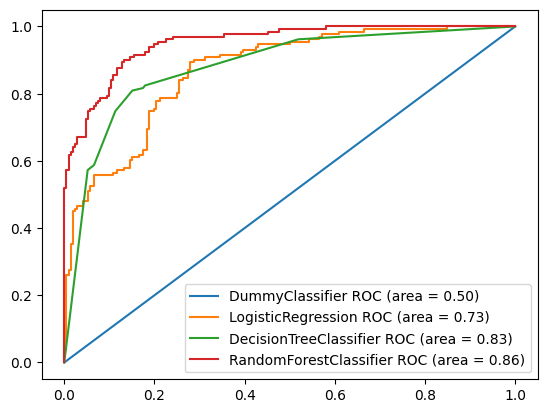

In [ ]:
# Plot AUC-ROC Curve
from sklearn.metrics import roc_curve

models = [dummy_model, log_model, tree_model, rf_model]

for model in models:
    train, test = df_train.copy(), df_test.copy()

    name = model.__class__.__name__

    if name == 'LogisticRegression':
      test[features] = mmTr.transform(test[features])

    # todo - get model predictions for test dataset
    test['pred'] = model.predict(test[features])

    # todo - calculate Area under the curve to display on the plot
    auc = roc_auc_score(test['target'], test['pred'])

    # todo - get model prediction probability for test dataset
    test['pred_proba'] = model.predict_proba(test[features])[:,1]

    # todo - use roc_curve function to get false positive rate, true positive rate, and threshold
    fpr, tpr, thresholds = roc_curve(test['target'], test['pred_proba'])

    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (name, auc))

    # plot the legend on the lower right value
    plt.legend(loc="lower right")

In [ ]:
# Plot Feature Importance Graph

def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'col': data.columns, 'imp': model.feature_importances_}).round(2)
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    fig = px.bar(data_frame=fea_imp, y='col', x='imp',
                 orientation='h',
                 text_auto=True,
                 height=500, width=600)
    fig.show()

In [ ]:
train, test = df_train.copy(), df_test.copy()
feature_importance(model=rf_model, data=test[features])

Observe how strong predictors impact the target variable

In [ ]:
train, test = df_train.copy(), df_test.copy()
test['pred'] = rf_model.predict(test[features])
test['pred_proba'] = rf_model.predict_proba(test[features])[:,1]

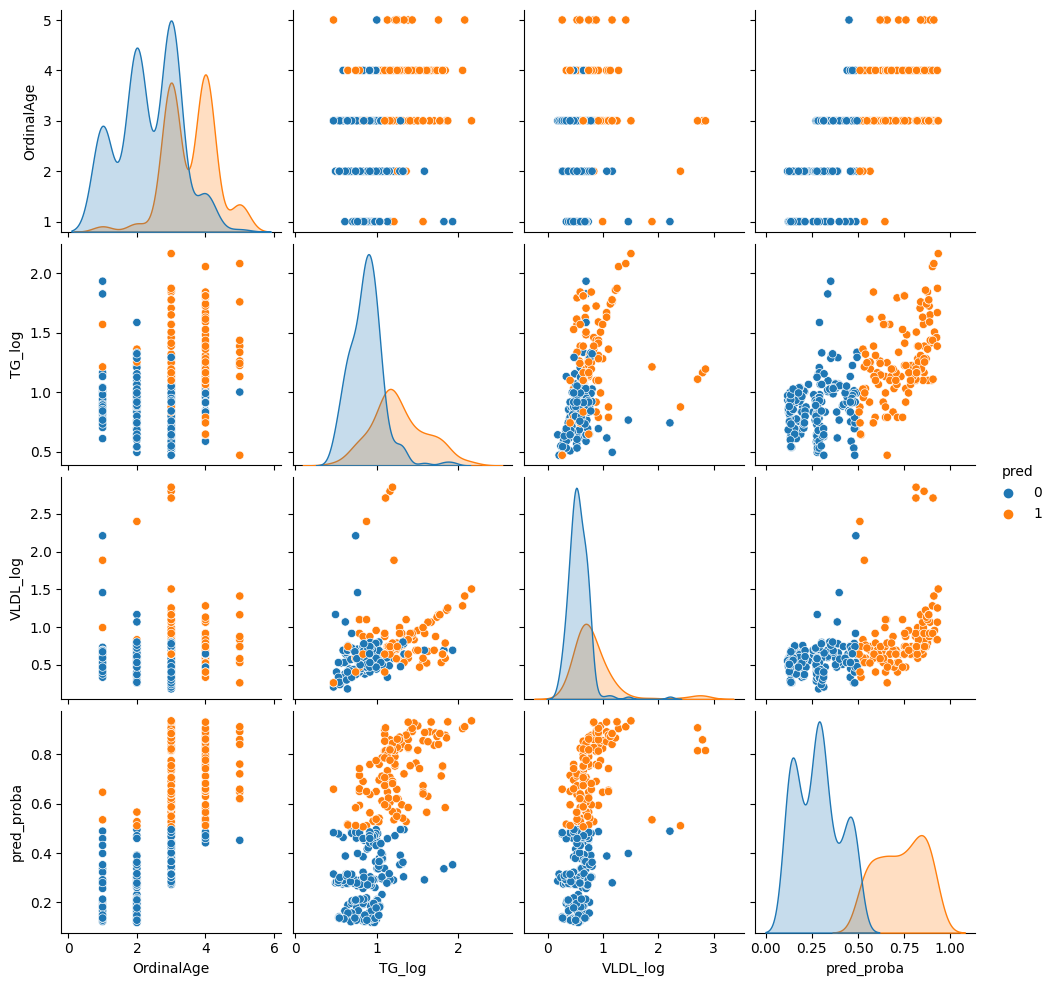

In [ ]:
# plot scatter-plot matrix to compare combination of numerical features
# use sns.pairplot function to plot the matrix

cols = ['OrdinalAge','TG_log','VLDL_log','pred','pred_proba']

# get list of columns to use for the plots
sns.pairplot(test[cols], hue='pred', diag_kind='kde')

## Step 7: Hyperparameter Tuning (OPTIONAL)
- In this step, will explore how to perform hyperparameter tuning using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
def grid_search(X_train, y_train, model, param_grid):
    """
    Gridsearch on different types of estimator - Logistic, Tree, RF, GBM etc
    """

    cv = StratifiedKFold(n_splits=5)

    grid_clf = GridSearchCV(estimator=model,
                          scoring='f1',
                          cv=cv,
                          param_grid=param_grid,
                          verbose=True,
                          n_jobs=-1,
                          refit=True)

    # fit the gridsearch
    grid_clf.fit(X_train, y_train)

    # find the best fit model
    model_best = grid_clf.best_estimator_
    model_score = grid_clf.best_score_

    # finally train your model
    model_best = model_best.fit(X_train, y_train)

    return model_best

Fitting 5 folds for each of 27 candidates, totalling 135 fits


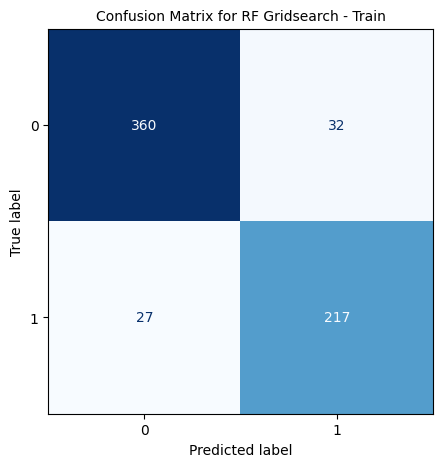

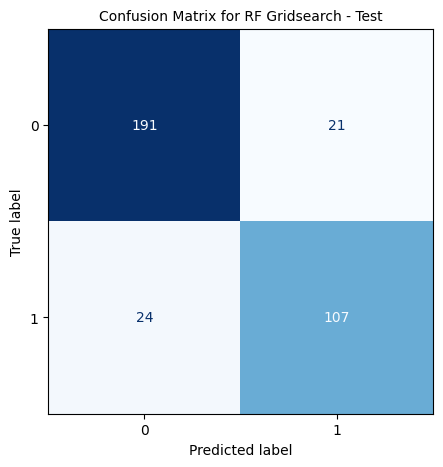

In [ ]:
# Build Random Forest Model

train, test = df_train.copy(), df_test.copy()

clf = RandomForestClassifier(max_features="sqrt",
                             n_estimators=200,
                             class_weight="balanced_subsample",
                             random_state=42)

param_grid =  {
                'max_depth': [1, 2, 3],
                'min_samples_leaf': [4, 5, 6],
                'min_samples_split': [4, 5, 6],
                }


rf_model_gs = grid_search(X_train=train[features],
                           y_train=train['target'],
                           model=clf,
                           param_grid=param_grid)

# predict
train['pred'] = rf_model_gs.predict(train[features])
test['pred'] = rf_model_gs.predict(test[features])

make_confusion_matrix(y=train['target'], y_pred=train['pred'], title="RF Gridsearch - Train")
make_confusion_matrix(y=test['target'], y_pred=test['pred'], title="RF Gridsearch - Test")